
Model Evaluation:
Mean Squared Error (MSE): 0.56
R-squared Score (R²): 0.58


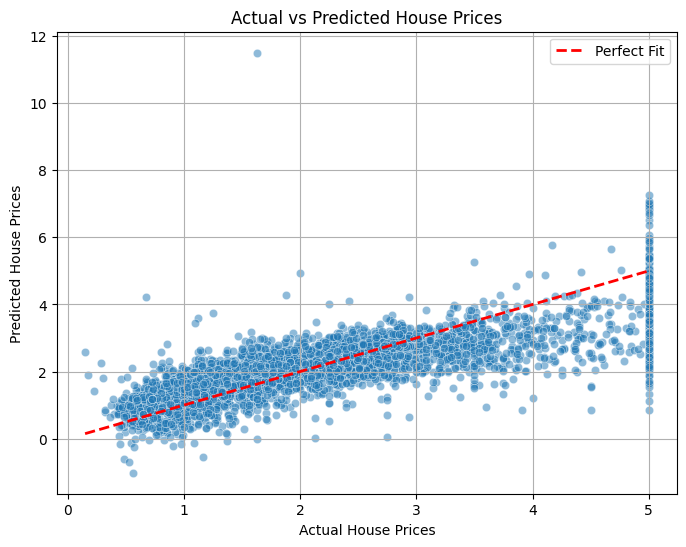


✅ Model saved as 'house_price_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target

X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared Score (R²):", round(r2, 2))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

joblib.dump(model, "house_price_model.pkl")
print("\n✅ Model saved as 'house_price_model.pkl'")


Sample Dataset:
    Area  Bedrooms  Bathrooms   Price
0  1200         2          1  200000
1  1500         3          2  250000
2  1700         3          2  270000
3  2000         4          2  310000
4  2200         4          3  340000

Model Performance:
R2 Score: 0.9817415316280315
MAE: 7413.7931034480425
MSE: 55231866.82520473
RMSE: 7431.814504224707

Predicted Price for 2500 sq.ft, 4BHK, 3 Bath: 352068.9655172415


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


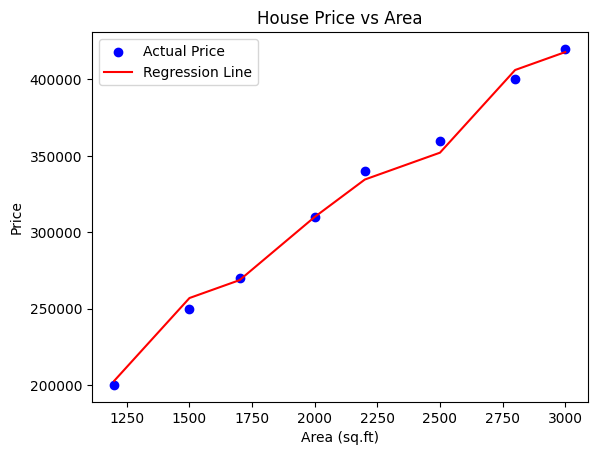

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = {
    'Area': [1200, 1500, 1700, 2000, 2200, 2500, 2800, 3000],
    'Bedrooms': [2, 3, 3, 4, 4, 4, 5, 5],
    'Bathrooms': [1, 2, 2, 2, 3, 3, 4, 4],
    'Price': [200000, 250000, 270000, 310000, 340000, 360000, 400000, 420000]
}

df = pd.DataFrame(data)
print("Sample Dataset:\n", df.head())

X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

sample_house = [[2500, 4, 3]]
predicted_price = model.predict(sample_house)
print("\nPredicted Price for 2500 sq.ft, 4BHK, 3 Bath:", predicted_price[0])

plt.scatter(df['Area'], df['Price'], color='blue', label="Actual Price")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.title("House Price vs Area")
plt.plot(df['Area'], model.predict(df[['Area', 'Bedrooms', 'Bathrooms']]),
         color='red', label="Regression Line")
plt.legend()
plt.show()
